In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

DATA_PATH = "/content/drive/MyDrive/코랩파일들/파이널프로젝트/data/"
SEED = 42


Mounted at /content/drive


In [2]:
!pip install pykrx
from pykrx import stock

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 18.0 MB/s eta 0:00:00


In [3]:
!pip install plotly
import plotly.express as px

In [4]:
!pip install plotly
!pip install koreanize-matplotlib
import matplotlib.pyplot as plt
import koreanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 12.7 MB/s eta 0:00:00


In [5]:
data = pd.read_csv(f"{DATA_PATH}labeled_data_final.csv")

In [6]:
def pad_str(str_list, target_len):

  padded_str_list = []
  for str in str_list:
    if len(str) < target_len:
      padded_str = "0" * (target_len - len(str)) + str
    else:
      padded_str = str
    padded_str_list.append(padded_str)
  return padded_str_list
str_list = data.Code.astype(str).to_list()
target_len = 6
padded_str_list = pad_str(str_list, target_len)

data.Code = padded_str_list

In [7]:
data

,Code,Name,Market,recommendationKey,sharesOutstanding,averageVolume10days,averageVolume,heldPercentInstitutions,shortRatio,sharesPercentSharesOut,...,5년평균dividendYield,EBITDAPS,동종업계_대비_PER,dividend,growth,value,business,finance,performance,volitality
0,005930,삼성전자,KOSPI,4.0,5.969780e+09,15819172.0,13878613.0,0.47631,4.28,0.000124,...,2.870,12143.0,-1.04,C,C,D,B,F,A+,C
1,373220,LG에너지솔루션,KOSPI,4.0,2.340000e+08,462840.0,383132.0,0.09387,17.29,0.000359,...,0.000,13172.0,157.68,E,B,B,B,H,D,C
2,000660,SK하이닉스,KOSPI,4.0,7.082170e+08,4628225.0,3960678.0,0.40008,2.00,0.000072,...,1.462,28792.0,26.96,D,C,C,C,H,A,B
3,207940,삼성바이오로직스,KOSPI,4.0,7.117400e+07,107980.0,64364.0,0.14091,3.35,0.000023,...,0.000,18442.0,20.85,E,A,C,A,H,D,C
4,005490,POSCO홀딩스,KOSPI,3.9,7.587620e+07,2944335.0,1697713.0,0.30222,8.45,0.001327,...,4.364,99067.0,8.11,B,C,D,B,G,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,013890,지누스,KOSPI,4.0,1.834530e+07,56730.0,46906.0,0.17710,15.61,0.000191,...,1.185,5909.0,5.01,D,C,D,C,G,D,E
196,381970,케이카,KOSPI,4.0,4.808650e+07,135983.0,257546.0,0.11685,1.84,0.000080,...,4.390,2093.0,9.55,B,C,D,C,H,D,D
197,057050,현대홈쇼핑,KOSPI,4.0,1.144780e+07,16129.0,13533.0,0.28244,8.74,0.000126,...,3.142,14666.0,-4.51,C,C,E,B,G,D,E
198,284740,쿠쿠홈시스,KOSPI,관련 데이터가 없습니다.,2.242240e+07,15804.0,20270.0,0.10643,5.28,0.000028,...,1.690,8956.0,-22.36,D,C,F,A,F,D,E


In [8]:
import datetime as dt

In [9]:
end = dt.datetime.today().date().strftime("%Y%m%d")
start = (dt.datetime.today().date() - dt.timedelta(365)).strftime("%Y%m%d")
# end = dt.datetime(2022,12,31).strftime("%Y%m%d")
# start = (dt.datetime(2022,12,31) - dt.timedelta(180)).strftime("%Y%m%d")
print(start,end)

20220829 20230829


1. 웹앱은 간단해야한다.
2. 사람은 자기자신을 객관화하는 것이 어렵다.
3. 좋지않은 기업을 보고싶어하는 사람은 없을 것이다.

In [10]:
# B이상을 노출하는 것으로 설정하는건 어떨까?, sector별 본인이 중요시하는 것 3개만 선정하도록 유도.
# 보통 이하의 기업을 보고싶어하는 사람들은 없지않을까?
# business, performance, volitality
recommendation= data[((data['business'] == "A")|(data['business'] == "B")|(data['business'] == "C"))&
 ((data['performance'] == "A")|(data['performance'] == "B")|(data['performance'] == "A+")|(data['performance'] == "C"))&
  ((data['volitality'] == "A")|(data['volitality'] == "B")|(data['volitality'] == "A+")|(data['volitality'] == "C"))]
recommendation
# B까지만하면 3개만 나왔었음.

,Code,Name,Market,recommendationKey,sharesOutstanding,averageVolume10days,averageVolume,heldPercentInstitutions,shortRatio,sharesPercentSharesOut,...,5년평균dividendYield,EBITDAPS,동종업계_대비_PER,dividend,growth,value,business,finance,performance,volitality
0,005930,삼성전자,KOSPI,4.0,5.969780e+09,15819172.0,13878613.0,0.47631,4.28,0.000124,...,2.870,12143.0,-1.04,C,C,D,B,F,A+,C
2,000660,SK하이닉스,KOSPI,4.0,7.082170e+08,4628225.0,3960678.0,0.40008,2.00,0.000072,...,1.462,28792.0,26.96,D,C,C,C,H,A,B
4,005490,POSCO홀딩스,KOSPI,3.9,7.587620e+07,2944335.0,1697713.0,0.30222,8.45,0.001327,...,4.364,99067.0,8.11,B,C,D,B,G,B,B
5,051910,LG화학,KOSPI,4.0,7.059230e+07,399881.0,287432.0,0.36433,6.50,0.000188,...,1.438,81652.0,14.63,D,C,D,B,G,B,C
7,005380,현대차,KOSPI,4.0,2.028760e+08,699789.0,594572.0,0.22792,4.89,0.000088,...,3.058,53685.0,-2.62,C,B,E,C,B,A,C
10,000270,기아,KOSPI,4.0,3.950820e+08,1446978.0,1229388.0,0.27907,17.01,0.000407,...,3.284,23820.0,-3.41,C,B,E,B,G,A,C
18,066570,LG전자,KOSPI,4.0,1.628850e+08,1065618.0,825302.0,0.26213,11.11,0.000518,...,0.912,36144.0,6.18,E,C,D,C,F,A,C
39,011200,HMM,KOSPI,3.2,4.890390e+08,1838939.0,2279608.0,0.30701,7.00,0.000117,...,3.430,22066.0,-1.80,C,C,E,A,H,A,A
58,011070,LG이노텍,KOSPI,4.0,2.366450e+07,235885.0,179614.0,0.28444,6.32,0.000281,...,0.680,91158.0,-3.29,E,C,E,B,H,B,C
109,039490,키움증권,KOSPI,4.0,2.481950e+07,106650.0,70016.0,0.31125,3.37,0.000165,...,1.676,161107.0,-0.58,D,B,E,A,F,B,C


In [11]:
stocks = recommendation["Name"].to_list()
stocks

['삼성전자',
 'SK하이닉스',
 'POSCO홀딩스',
 'LG화학',
 '현대차',
 '기아',
 'LG전자',
 'HMM',
 'LG이노텍',
 '키움증권',
 '효성첨단소재',
 '두산',
 '효성티앤씨']

In [12]:
tmp = pd.DataFrame()
for n in stocks:
  tmp[n] = stock.get_market_ohlcv(start, end, data[data['Name'] == n]['Code'])['종가']
tmp

,삼성전자,SK하이닉스,POSCO홀딩스,LG화학,현대차,기아,LG전자,HMM,LG이노텍,키움증권,효성첨단소재,두산,효성티앤씨
날짜,,,,,,,,,,,,,
2022-08-29,58600,92500,244000,604000,188500,77500,96200,22100,326500,80200,432000,83900,308000
2022-08-30,58800,93200,254000,611000,195500,80100,97500,21800,335500,83800,421000,82300,309500
2022-08-31,59700,95200,255000,632000,196000,80800,101000,22250,344000,85600,424000,82800,313500
2022-09-01,58400,92400,253000,623000,195500,80200,97700,21600,336000,81900,424500,78700,306500
2022-09-02,57500,91700,246000,610000,196500,80800,97300,21350,345500,81600,419000,78000,304000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-23,67100,116000,551000,562000,187500,78700,98600,17160,255500,97700,428500,105800,317000
2023-08-24,68200,120900,579000,563000,186400,78800,99100,17110,258000,99900,431500,112600,319500
2023-08-25,67100,116500,577000,560000,186200,78100,98300,17000,254500,98900,429500,110300,314000


In [13]:
daily_ret = tmp.pct_change()
annual_ret = daily_ret.mean() * tmp.shape[0]

daily_cov = daily_ret.cov()
annual_cov = daily_cov * tmp.shape[0]

# 상관계수를 활용

In [ ]:
tmp.corr()[[f'{stocks[0]}']].sort_values(by=f'{stocks[0]}')

,삼성전자
HMM,-0.388186
LG이노텍,-0.086594
효성티앤씨,0.376709
키움증권,0.453751
LG화학,0.469315
두산,0.535856
현대차,0.654737
기아,0.654998
POSCO홀딩스,0.764321
SK하이닉스,0.811206


In [ ]:
mask = tmp.corr()[[f'{stocks[0]}']].sort_values(by=f'{stocks[0]}')[f'{stocks[0]}']<0.5
# 상관관계가 0.5이하

In [ ]:
tmp.corr()[[f'{stocks[0]}']][mask]

,삼성전자
LG화학,0.469315
HMM,-0.388186
LG이노텍,-0.086594
키움증권,0.453751
효성티앤씨,0.376709


In [ ]:
stocks = list(tmp.corr()[[f'{stocks[0]}']][mask].index)+[f"{stocks[0]}"]# 상위 3개 선정

In [ ]:
daily_ret = tmp[stocks].pct_change()
annual_ret = daily_ret.mean() * tmp[stocks].shape[0]

daily_cov = daily_ret.cov()
annual_cov = daily_cov * tmp[stocks].shape[0]

In [ ]:
port_ret = []
port_risk = []
port_weights = []
shape_ratio = []
rf = 0.0325

for i in range(30000):

    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)


    returns = np.dot(weights, annual_ret)


    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))

    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)
    shape_ratio.append(returns/risk)

portfolio = {'Returns' : port_ret, 'Risk' : port_risk, 'Shape' : shape_ratio}
for j, s in enumerate(stocks):
    portfolio[s] = [weight[j] for weight in port_weights]

df = pd.DataFrame(portfolio)
max_shape = df.loc[df['Shape'] == df['Shape'].max()]
min_risk = df.loc[df['Risk'] == df['Risk'].min()]
tmp2 = df.groupby('Risk')[['Returns']].max().reset_index()

In [ ]:
best_ret = tmp2.loc[0,'Returns']
for i in range(tmp2.shape[0]):
  if tmp2.loc[i,'Returns']<best_ret:
    tmp2.drop(index=i,inplace=True)
  else:
    best_ret = tmp2.loc[i,'Returns']

In [ ]:
import plotly.graph_objects as go


fig = go.Figure()


fig.add_trace(go.Scatter(x=df['Risk'], y=df['Returns'], mode='markers',name='Portfolio',marker=dict(
        size=5,    # 점 크기
        color=df['Shape'],
        colorscale = 'earth',
        showscale=True,  # colorscales 보여줌
        colorbar={"title": "Shape"},
        line_width=1, # 마커 라인 두께 설정
)))


fig.add_trace(go.Scatter(x=tmp2['Risk'], y=tmp2['Returns'],name='Efficient Frontier',line_width=5,mode='lines'))

fig.add_trace(go.Scatter(x=max_shape['Risk'],y=max_shape['Returns'], mode='markers',name='Max_Shape',marker=dict(size =20,symbol='star')))
fig.add_trace(go.Scatter(x=min_risk['Risk'],y=min_risk['Returns'], mode='markers',name='Min_risk',marker=dict(size =20,symbol='star')))

fig.add_trace(go.Scatter(x=[0,max_shape['Risk'].iloc[0],0.5], y=[rf,max_shape['Returns'].iloc[0],(max_shape['Returns'].iloc[0] - rf)/max_shape['Risk'].iloc[0]*0.5+rf],name='New EF',line_width=5,mode='lines'))

fig.update_layout(title='Efficient Frontier Graph',
                   xaxis_title='Risk',
                   yaxis_title='Expected Return')

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="left",
    x=0.05
))


fig.show()

In [ ]:
max_shape

,Returns,Risk,Shape,LG화학,HMM,LG이노텍,키움증권,효성티앤씨,삼성전자
28460,0.17031,0.26409,0.644894,0.061661,0.004287,0.008928,0.49274,0.003844,0.428541


In [ ]:
min_risk

,Returns,Risk,Shape,LG화학,HMM,LG이노텍,키움증권,효성티앤씨,삼성전자
10222,0.057695,0.210078,0.274638,0.13886,0.081436,0.079066,0.034357,0.095174,0.571106


# 개별 Shape 사용

In [14]:
daily_ret = tmp.pct_change()
annual_ret = daily_ret.mean() * tmp.shape[0]

daily_cov = daily_ret.cov()
annual_cov = daily_cov * tmp.shape[0]

In [15]:
tmp2 = pd.DataFrame((annual_ret-0.02)/daily_ret.std()*np.sqrt(252),columns= ['Shape']).sort_values(by='Shape',ascending=False)
tmp2
# 개별 shape 말고 고객에게 제시하는 주식 중 고객이 선택한 주식과 상관계수가 낮은 기업으로 포트폴리오를 구성해주는 것은 어떨까?

,Shape
POSCO홀딩스,537.725670
SK하이닉스,208.427237
두산,198.116628
키움증권,196.700403
삼성전자,149.388449
효성티앤씨,70.416757
LG전자,53.307618
효성첨단소재,52.447653
기아,51.176230
현대차,-0.988961


In [16]:
stocks = list(tmp2.iloc[0:5].index)# 상위 5개 선정

In [17]:
daily_ret = tmp[stocks].pct_change()
annual_ret = daily_ret.mean() * tmp[stocks].shape[0]

daily_cov = daily_ret.cov()
annual_cov = daily_cov * tmp[stocks].shape[0]

In [18]:
port_ret = []
port_risk = []
port_weights = []
shape_ratio = []
rf = 0.0325

for i in range(30000):

    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)


    returns = np.dot(weights, annual_ret)


    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))

    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)
    shape_ratio.append(returns/risk)

portfolio = {'Returns' : port_ret, 'Risk' : port_risk, 'Shape' : shape_ratio}
for j, s in enumerate(stocks):
    portfolio[s] = [weight[j] for weight in port_weights]

df = pd.DataFrame(portfolio)
max_shape = df.loc[df['Shape'] == df['Shape'].max()]
min_risk = df.loc[df['Risk'] == df['Risk'].min()]
tmp2 = df.groupby('Risk')[['Returns']].max().reset_index()

In [19]:
best_ret = tmp2.loc[0,'Returns']
for i in range(tmp2.shape[0]):
  if tmp2.loc[i,'Returns']<best_ret:
    tmp2.drop(index=i,inplace=True)
  else:
    best_ret = tmp2.loc[i,'Returns']

In [20]:
import plotly.graph_objects as go


fig = go.Figure()


fig.add_trace(go.Scatter(x=df['Risk'], y=df['Returns'], mode='markers',name='Portfolio',marker=dict(
        size=5,    # 점 크기
        color=df['Shape'],
        colorscale = 'earth',
        showscale=True,  # colorscales 보여줌
        colorbar={"title": "Shape"},
        line_width=1, # 마커 라인 두께 설정
)))


fig.add_trace(go.Scatter(x=tmp2['Risk'], y=tmp2['Returns'],name='Efficient Frontier',line_width=5,mode='lines'))

fig.add_trace(go.Scatter(x=max_shape['Risk'],y=max_shape['Returns'], mode='markers',name='Max_Shape',marker=dict(size =20,symbol='star')))
fig.add_trace(go.Scatter(x=min_risk['Risk'],y=min_risk['Returns'], mode='markers',name='Min_risk',marker=dict(size =20,symbol='star')))

fig.add_trace(go.Scatter(x=[0,max_shape['Risk'].iloc[0],0.5], y=[rf,max_shape['Returns'].iloc[0],(max_shape['Returns'].iloc[0] - rf)/max_shape['Risk'].iloc[0]*0.5+rf],name='New EF',line_width=5,mode='lines'))

fig.update_layout(title='Efficient Frontier Graph',
                   xaxis_title='Risk',
                   yaxis_title='Expected Return')

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="left",
    x=0.05
))


fig.show()

In [21]:
max_shape

,Returns,Risk,Shape,POSCO홀딩스,SK하이닉스,두산,키움증권,삼성전자
7411,0.710468,0.301551,2.356048,0.590941,0.317481,0.068563,0.00509,0.017926


In [22]:
min_risk

,Returns,Risk,Shape,POSCO홀딩스,SK하이닉스,두산,키움증권,삼성전자
11902,0.311372,0.214258,1.453259,0.141924,0.077478,0.072119,0.022578,0.685901


In [35]:
max_shape.values[0][1]

0.30155072815272466

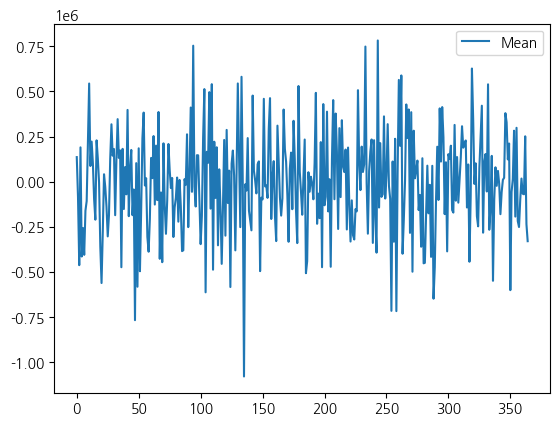

In [112]:
import numpy as np
import matplotlib.pyplot as plt

assets = ["POSCO홀딩스", "SK하이닉스", "두산",'키움증권','삼성전자']
weights = max_shape.values[0][-5:]


portfolio_mu = max_shape.values[0][0]
portfolio_sigma = max_shape.values[0][1]

mc_sims = 365

portfolio_sims = pd.DataFrame()
balance = 1000000
for m in range(0, mc_sims):
    daily_returns = np.random.normal(daily_ret.mean().to_numpy().reshape(5,1),(daily_ret.std()* np.sqrt(tmp[stocks].shape[0])).to_numpy().reshape(5,1), size=(len(assets), 1))

    portfolio_returns = np.dot(weights, daily_returns)

    portfolio_sims[m]= np.cumprod(portfolio_returns)

portfolio_mean = np.mean(portfolio_sims, axis=0)
portfolio_std = np.std(portfolio_sims, axis=0)

plt.plot(portfolio_mean*1000000, label="Mean")

plt.legend()
plt.show()

In [108]:
daily_returns

array([[0.03150175],
       [0.09555736],
       [0.32367389],
       [0.17888917],
       [0.27616411]])

In [ ]:
exp_ret = float(input("원하는 기대수익률은 얼마인가?"))/100

원하는 기대수익률은 얼마인가?40


In [ ]:
# 이 계산도 두가지를 제시해야하지 않을까? 이론상효율적인 것보다 risk를 최소화하고싶을 수도 있으니까..
import sympy

w = sympy.Symbol('w')

equation = w*0.02 + (1-w)*max_shape['Returns'].values[0] - exp_ret

solution = sympy.solve(equation, w)
solution = float(solution[0])
print(f"채권의 비중 : {solution}")
print(f"이 경우 Risk : {(1-solution)*max_shape['Risk'].iloc[0]}")

채권의 비중 : 0.4291297960583462
이 경우 Risk : 0.17616761902692174


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
if solution >= 0:

  fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],subplot_titles=("<b>포트폴리오", f"<b>기대수익을 위한 포트폴리오<br><sup>자기자본의 {solution*100:0.4}%만큼 채권투자</sup>"))


  fig.add_trace(go.Pie(
      values=list(max_shape.values[0][-5:]),
      labels=list(max_shape.columns[-5:]),
      domain=dict(x=[0, 0.5]),
      name="기존 포트폴리오"),
      row=1, col=1)

  fig.add_trace(go.Pie(
      values=list(max_shape.values[0][-5:]* (1-float(solution)))+[float(solution)] ,
      labels=list(max_shape.columns[-5:]) + ['채권'],
      domain=dict(x=[0.5, 1.0]),
      name="기대수익 포트폴리오"),
      row=1, col=2)

  fig.show()

else:
  fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],subplot_titles=("<b>포트폴리오", f"<b>투자금 비중</b><br><sup>자기자본의 {-solution*100:0.4}%만큼 차입</sup>"))


  fig.add_trace(go.Pie(
      values=list(max_shape.values[0][-5:]),
      labels=list(max_shape.columns[-5:]),
      domain=dict(x=[0, 0.5])),
      row=1, col=1)

  fig.add_trace(go.Pie(
      values=[1/(1-solution),1-(1/(1-solution))] ,
      labels=['자기자본','차입금'],
      domain=dict(x=[0.5, 1.0])),
      row=1, col=2)

  fig.show()